In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

2022-10-13 18:07:20.997103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 18:07:21.105517: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-13 18:07:21.105536: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-13 18:07:21.129032: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-13 18:07:21.603636: W tensorflow/stream_executor/platform/de

Прогнозирование

In [3]:
def func(t: float):
    return np.sin(-2*t**2 + 7*t)

In [26]:
h = 0.001
t = (0, 5)
D = 5
ans_x = np.arange(t[0],t[1] + h, h)
ans = func(ans_x)

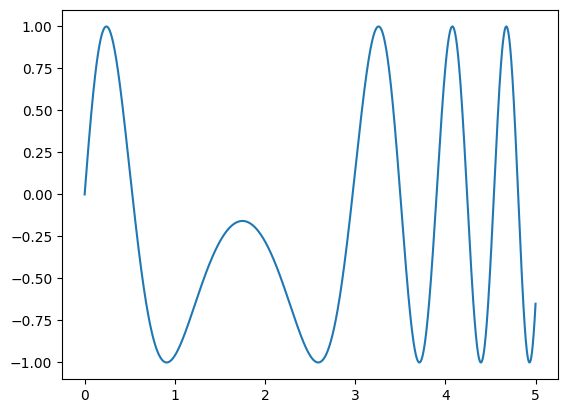

In [27]:
plt.plot(ans_x, ans)

In [60]:
X = [ans[i:i+D].tolist() for i in range(0, len(ans) - D)]
y = [ans[i] for i in range(D, len(ans))]

In [63]:
predictor =  keras.Sequential([
        layers.Dense(1,input_dim=D, activation="linear", name="pred"),
    ]
)
opt = keras.optimizers.SGD(learning_rate=0.1)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [64]:
predictor.fit(X, y, batch_size=1, epochs=2, shuffle=True)

Epoch 1/2
4996/4996 [==============================] - 4s 744us/step - loss: 8.2955e-04 - mae: 0.0224
Epoch 2/2
4996/4996 [==============================] - 4s 745us/step - loss: 5.4067e-04 - mae: 0.0183


In [65]:
my_ans = predictor.predict(X).flatten()

157/157 [==============================] - 0s 717us/step


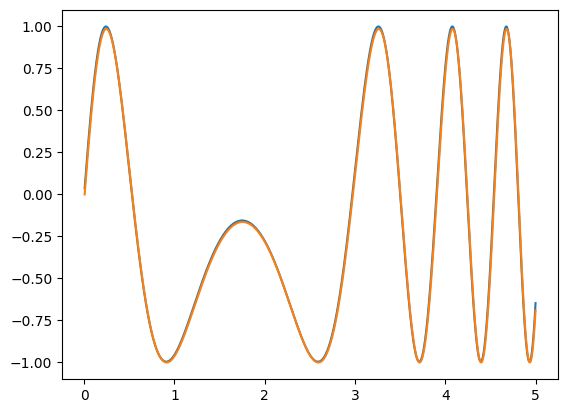

In [66]:
plt.plot(ans_x[D:], y)
plt.plot(ans_x[D:], my_ans)

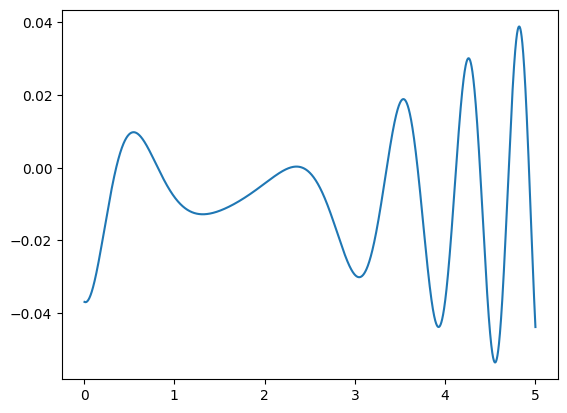

In [67]:
errors = my_ans - y
plt.plot(ans_x[D:], errors)